In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('NetflixHistory.csv')

  Seleccionamos solo los dispositivos que pertenecen a Chona

In [3]:
DispositivosProhibidos = [
 'Sony PS4',
 'Netflix Windows App - Cadmium Windows Mobile', 
 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 
 'Chrome PC (Cadmium)', 
 'Samsung 2015 NT14M DTV Smart TV', 
 'iPhone 5S GSM', 
 'Google Chromecast V3 Streaming Stick'   
]

for elemento in DispositivosProhibidos:
  df.drop(df[df['Device Type'] == elemento].index, inplace = True)
df 

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


Seleccionamos solo los registros que en el campo de "Suplemental Video Type" digan NaN, osea null.

In [4]:
df = df[df['Supplemental Video Type'].isna( )]

**Ejercicio A**: Contabilizar el dispositivo con el que más títulos se reprodujeron.


In [5]:
df['Device Type'].value_counts().to_frame()

,Device Type
Apple Apple TV 4 Apple TV,3439
Apple TV 3 (revised),1216
Netflix Chrome MAC (Cadmium) HTML 5,449
Safari MAC (Cadmium),261
Apple iPhone 4S,259
Apple iPod Touch 5G,220
Wii Bowser,99
LG 2016 LG M16 STD RGBW UHD TV Smart TV,91
Apple iPad 3,73
Apple iPhone 11 Pro,39


Creamos dos funciones Lambda que sirven para separar en partes, y seleccionar la primera de ellas.

In [6]:
primer_posGuion = lambda t: t.split('-')[0]
primer_pos2Puntos = lambda m: m.split(':')[0]

Separo los titulos por partes con los " : " y los guardo en separacion_lista. (No usamos la funcion primer_pos2Puntos ya que no ncesitabamos seleccionar la primera parte, por ahora)

In [7]:
separacion_lista = df['Title'].str.split(pat = ':', expand=False).to_frame()
separacion_lista

,Title
0,"[Community, Temporada 3, Teoría del caos cor..."
1,"[Community, Temporada 3, Ecología competitiv..."
2,"[Community, Temporada 3, Geografía del confl..."
3,"[Community, Temporada 2, Intermediate Docume..."
4,"[Community, Temporada 3, El documental (Capí..."
...,...
12992,"[Lost, Temporada 1, Éxodo, Parte 1 (Capítul..."
12993,"[Lost, Temporada 1, Nacida para correr (Capí..."
12994,"[Lost, Temporada 1, Éxodo, Parte 1 (Capítul..."
12995,"[Lost, Temporada 1, Éxodo, Parte 1 (Capítul..."


Creo un nuevo campo que se llama num_partes, en el que guardo la cantidad de partes de la lista.

In [8]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,"[Community, Temporada 3, Teoría del caos cor...",3
1,"[Community, Temporada 3, Ecología competitiv...",3
2,"[Community, Temporada 3, Geografía del confl...",3
3,"[Community, Temporada 2, Intermediate Docume...",3
4,"[Community, Temporada 3, El documental (Capí...",3
...,...,...
12992,"[Lost, Temporada 1, Éxodo, Parte 1 (Capítul...",4
12993,"[Lost, Temporada 1, Nacida para correr (Capí...",3
12994,"[Lost, Temporada 1, Éxodo, Parte 1 (Capítul...",4
12995,"[Lost, Temporada 1, Éxodo, Parte 1 (Capítul...",4


Filtro los que tengan más de 3 partes, es decir que se pueden considerar como series debido al formato *NOMBRE DE LA SERIE : TEMPORADA : EPISODIO*. (Cabe aclarar, que pusimos mayor a 3 partes porque hay peliculas como "El señor de los anillos: El retorno del rey" que tienen dos partes) 

In [9]:
separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista
df = pd.concat([df,separacion_lista['tipo']], axis = 1)
df

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,tipo
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina),serie
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina),serie
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina),serie
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina),serie
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina),serie
...,...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina),serie
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina),serie
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina),serie
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina),serie


**Ejercicio B**: Encontrar la película con más ocurrencias y la película con mayor duración total.


In [10]:
pelis = df[df['tipo']== 'pelicula']
series = df[df['tipo']== 'serie']


In [11]:
pelis_duracion = pelis.sort_values(by=['Duration'],ascending=[False]).head(1)
pelis_duracion.filter(["Title", "Duration", "tipo"])

,Title,Duration,tipo
8127,El club de la pelea,02:20:11,pelicula


In [12]:
pelis_ocurrencias = pelis.value_counts('Title').head(1).to_frame()
pelis_ocurrencias

,0
Title,
Star Wars: El Imperio contraataca,7


**Ejercicio C:** Generar un TOP “N” de series vistas y graficar.

*   Por tiempo visto
*   Por ocurrencias



Le aplico a las series la funcion ***primer_pos2Puntos*** para que seleccione el nombre de la serie, y lo guarde en la columna 'NombreSerie'. 

In [13]:
series['NombreSerie'] = series['Title'].apply(primer_pos2Puntos).to_frame()


Paso la duración que esta en HoraMinutosSegundos a minutos

In [14]:
a_minutos = lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2])/100
series['Duration in Minutes'] = series['Duration'].str.split(':').apply(a_minutos)

,Duration in Minutes
NombreSerie,
Cómo conocí a tu madre,13470.51
Community,13303.98
Friends,11392.56
La ley de los audaces,10554.57
Doctor Who,8787.65
Dr. House,8022.16


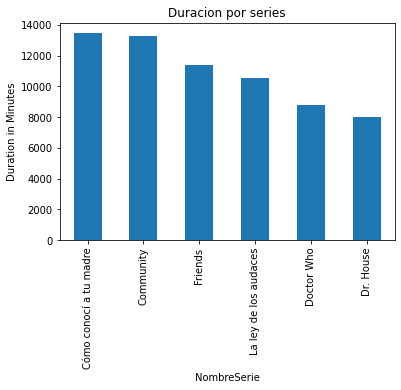

In [15]:
n = 6
def TopNDuracion(data):
  grafico2 = series.filter(['NombreSerie', 'Duration in Minutes'])
  grafico2 = grafico2.groupby('NombreSerie')['Duration in Minutes'].apply(sum)
  grafico_filtrado = grafico2.sort_values(axis = 0,ascending=[False]).head(n)
  grafico_filtrado.plot(kind = 'bar',   title="Duracion por series")
  plt.ylabel('Duration in Minutes')
  return (grafico_filtrado.to_frame())
TopNDuracion(series)

,NombreSerie
Community,870
Cómo conocí a tu madre,780
Friends,604
Dr. House,346
La ley de los audaces,330
Brooklyn Nine-Nine,314
Doctor Who,279
Two and a Half Men,229
That '70s Show,171
Lost,123


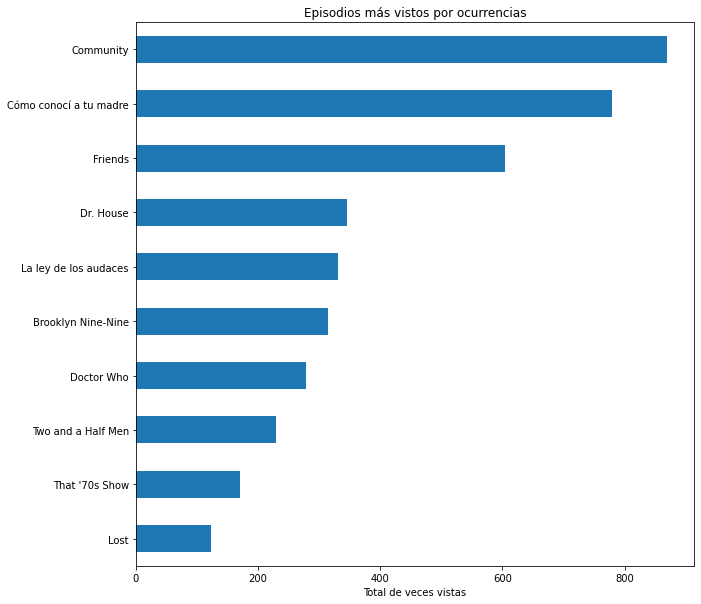

In [16]:
n= 10
def TopNOcurrencias (data):
  series_ocurrencias=  series['NombreSerie'].value_counts().head(n)
  grafico = series_ocurrencias.plot(kind = 'barh', figsize=(10,10))
  plt.title('Episodios más vistos por ocurrencias')
  plt.xlabel('Total de veces vistas')
  grafico.invert_yaxis()
  return(series_ocurrencias.to_frame())
TopNOcurrencias (series)

**Ejercicio D:** Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.



In [17]:
def getDateTime(input):
  date = dt.strptime(input, '%Y-%m-%d %H:%M:%S')
  date = (date.strftime("%Y-%B-%A-%d %H:%M:%S"))
  res = ""

  for a in date:
    if a == "-" or a == "" or a == ":":
      res += "."
    else:
      res += a

  return res.split(".")

def defineYearColumn(input):
  res = getDateTime(input)
  return res[0]

def defineMonthColumn(input):
  res = getDateTime(input)
  return res[1]

def defineDayColumn(input):
  res = getDateTime(input)
  return res[2]

def defineHourColumn(input):
  res = getDateTime(input)
  return res[4]

In [18]:
df["Year"] = df["Start Time"].apply(defineYearColumn)
df["Month"] = df["Start Time"].apply(defineMonthColumn)
df["Day"] = df["Start Time"].apply(defineDayColumn)
df["Hour"] = df["Start Time"].apply(defineHourColumn)

In [19]:
df_graph = pd.DataFrame({}, columns=["Hour", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_graph["Hour"] = ["00", "02", "04", "06", "08", "10", "12", "14", "16", "18", "20", "22"]
df_graph = df_graph.set_index(["Hour"])

In [20]:
time_range = {
    "00":"01",
    "02":"03",
    "04":"05",
    "06":"07",
    "08":"09",
    "10":"11",
    "12":"13",
    "14":"15",
    "16":"17",
    "18":"19",
    "20":"21",
    "22":"23"
}
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for day in days:
  data = df.groupby(["Title", "Day", "Hour"]).size().reset_index()
  data = data[data["Day"] == day]

  prom_day = []

  for h in time_range:
    filtered_data = data[data["Hour"].between(h,time_range[h])]
    prom_day.append(len(filtered_data))

  df_graph[day] = prom_day
print(df_graph)

      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Hour                                                                
00        28       35         35        22      31        39      30
02        28       34         22        26      20        44      36
04        23       33         22        36      29        25      25
06        33       22         21        30      28        35      27
08        29       31         24        35      35        26      28
10        28       18         27        37      27        41      26
12        30       18         26        29      36        35      25
14        21       28         33        26      30        35      26
16        29       23         21        36      38        25      30
18        34       32         22        37      37        48      29
20        35       37         22        31      30        28      21
22        26       29         23        27      27        33      27


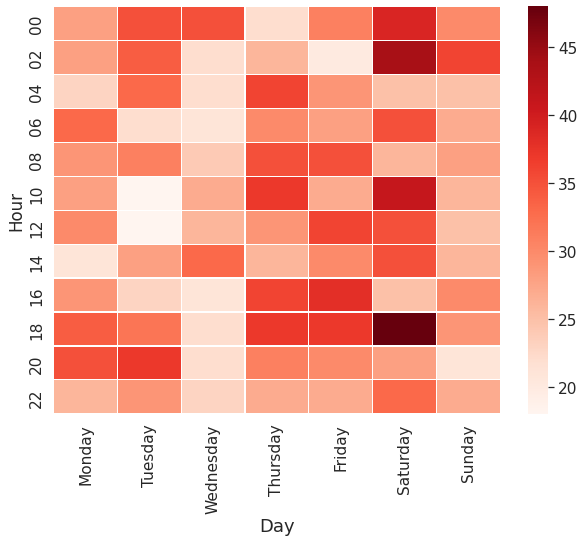

In [22]:
fig = plt.figure(figsize = (10, 7.5))
sns.set(font_scale=1.4)
s = sns.heatmap(df_graph, cmap = "Reds", linewidths=0.1)
s.set_xlabel("Day", fontSize = 18)
s

**Ejercicio E:** Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.


Uso una función de lambda en la cula separo el año de las demás columnas (mes, días, horas, minutos y segundos) ya que encontramos el siguiente patron en 'Start Time': AÑO-MES-DIA+HORA+MINUTOS+SEGUNDOS. Entonces si seleccionamos la primera parte de la lista ([0]) nos devolvería el año

In [23]:
df['Year'] =  df['Start Time'].apply(primer_posGuion).to_frame()
df

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,tipo,Year,Month,Day,Hour
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina),serie,2022,August,Sunday,54
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina),serie,2022,August,Sunday,33
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina),serie,2022,August,Sunday,11
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina),serie,2022,August,Sunday,50
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina),serie,2022,August,Sunday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina),serie,2015,January,Thursday,21
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina),serie,2015,January,Thursday,20
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina),serie,2015,January,Thursday,18
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina),serie,2015,January,Thursday,16


Filtro la lista por titulos y años.

In [24]:
df.sort_values(by=['Year'],ascending=[False])
df.filter(["Title", "Year"])

,Title,Year
0,Community: Temporada 3: Teoría del caos correc...,2022
1,Community: Temporada 3: Ecología competitiva (...,2022
2,Community: Temporada 3: Geografía del conflict...,2022
3,Community: Temporada 2: Intermediate Documenta...,2022
4,Community: Temporada 3: El documental (Capítul...,2022
...,...,...
12992,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),2015
12993,Lost: Temporada 1: Nacida para correr (Capítul...,2015
12994,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),2015
12995,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),2015


Hago que cuente la cantidad de títulos vistos por año. Inserto el códigio del gráfico en donde los años son las columnas (eje y) y los titulos le dan la longitud (eje x)

,Year
2015,1191
2020,1016
2018,916
2016,807
2017,795
2021,673
2019,550
2022,253


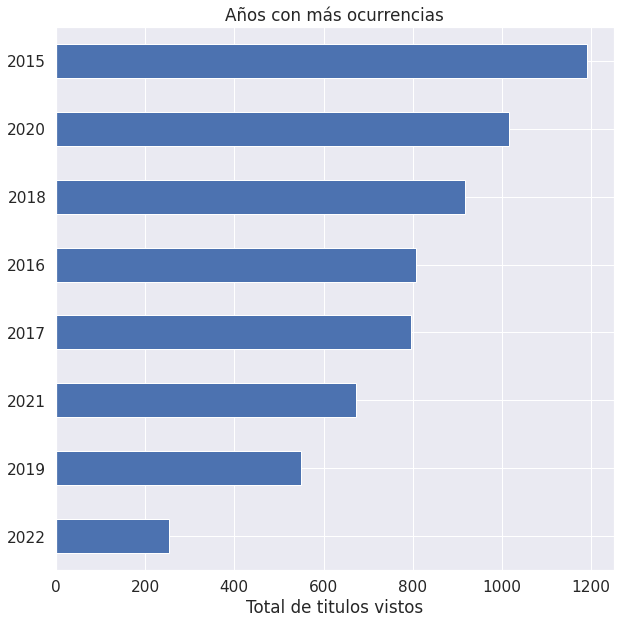

In [25]:
grafico = df['Year'].value_counts().plot(kind = 'barh', figsize=(10,10))
plt.title('Años con más ocurrencias')
plt.xlabel('Total de titulos vistos')
grafico.invert_yaxis()
df['Year'].value_counts().to_frame()


**Ejercicio F:** Total de días de todos los títulos reproducidos.

Observo la columna de 'Duration' del archivo

In [26]:
df['Duration'].head(10)

0    00:02:54
1    00:21:33
2    00:21:28
3    00:20:41
4    00:21:20
5    00:20:40
6    00:21:42
7    00:21:19
8    00:01:59
9    00:00:16
Name: Duration, dtype: object

Convertí el dtype de object a timedelta

In [27]:
df['Duration'] = pd.to_timedelta(df['Duration'])

Por último filtro las duraciones de más de 1 minuto asi me saco de encima los hooks cuando nos quedamos sobre un título

In [28]:
df[(df['Duration']> '0 days 00:01:00')]
print("El total de días de todos los titulos reproducidos es de: " +str(df['Duration'].sum()))

El total de días de todos los titulos reproducidos es de: 99 days 18:11:41


**Bonus 1:** Identificar cuál fue la película de Star Wars más veces vista por duración.

A las peliculas le aplico la función Lambda ***primer_pos2Puntos*** para que seleccione todas las peliculas que Empiecen con "Star Wars.... ". Luego las agrupo y sumo sus duraciones (que ya las converti a minutos con la función ***a_minutos***)

In [29]:
pelis['Duration in Minutes'] = pelis['Duration'].str.split(':').apply(a_minutos)
pelis['NombrePeli'] = pelis['Title'].apply(primer_pos2Puntos).to_frame()
Star_Wars = pelis[pelis['NombrePeli']=='Star Wars'].filter(['NombrePeli', 'Title', 'Duration in Minutes'])
Star_Wars = Star_Wars.groupby('Title')['Duration in Minutes'].apply(sum)
StarWars_Filtrado = Star_Wars.sort_values(axis = 0,ascending=[False])
StarWars_Filtrado.to_frame()

,Duration in Minutes
Title,
Star Wars: El Imperio contraataca,489.53
Star Wars: Una nueva esperanza,339.54
Star Wars: El regreso del Jedi,149.27
Star Wars: La venganza de los Sith,134.00
Star Wars: La amenaza fantasma,131.66
Star Wars: El despertar de la fuerza,118.62
Star Wars: El ataque de los clones,106.38
